# Home field advantage in the 2019-2020 NFL season

### Goal and data source

The following is an analysis of the 2019-2020 NFL season and the games that were played. 
The purpose of this analysis is to evelauate the statistical advantage that playing as the home team has.

Start by taking the data provided from https://www.pro-football-reference.com/years/2019/games.htm

In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('playoff_data_2019.csv')
df.columns = ['Week','Day','Date','Time','Winner','win_at_home','Loser','box','PtsW','PtsL','YdsW','TOW','YdsL','TOL']
df

,Week,Day,Date,Time,Winner,win_at_home,Loser,box,PtsW,PtsL,YdsW,TOW,YdsL,TOL
0,1,Thu,5-Sep,8:20PM,Green Bay Packers,@,Chicago Bears,boxscore,10,3,213,0,254,1
1,1,Sun,8-Sep,1:00PM,Tennessee Titans,@,Cleveland Browns,boxscore,43,13,339,0,346,3
2,1,Sun,8-Sep,1:00PM,Minnesota Vikings,NaN,Atlanta Falcons,boxscore,28,12,269,0,345,3
3,1,Sun,8-Sep,1:00PM,Philadelphia Eagles,NaN,Washington Redskins,boxscore,32,27,436,0,398,0
4,1,Sun,8-Sep,1:00PM,Los Angeles Rams,@,Carolina Panthers,boxscore,30,27,349,1,343,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,17,Sun,29-Dec,4:25PM,Philadelphia Eagles,@,New York Giants,boxscore,34,17,400,0,397,2
252,17,Sun,29-Dec,4:25PM,Dallas Cowboys,NaN,Washington Redskins,boxscore,47,16,517,1,271,2
253,17,Sun,29-Dec,4:25PM,Baltimore Ravens,NaN,Pittsburgh Steelers,boxscore,28,10,304,2,168,2
254,17,Sun,29-Dec,4:25PM,Los Angeles Rams,NaN,Arizona Cardinals,boxscore,31,24,424,0,393,5


### Clean-up

The data is far from perfect here, cleaning it will all for it to be better utilized.
The win_at_home column will be used to identify games where the home team won.
Adding point differientials will allow for further analysis in the future.

In [3]:
home_team = df.win_at_home + df.Loser
home_team = home_team.replace(np.nan,'yes')
home_team[home_team != 'yes']='no'
df['win_at_home'] = home_team
point_dif = df.PtsW - df.PtsL 
df['point_dif'] = point_dif
yards_dif = df.YdsW - df.YdsL
df['yards_dif'] = yards_dif
df = df.drop(columns = ['box'])
df

,Week,Day,Date,Time,Winner,win_at_home,Loser,PtsW,PtsL,YdsW,TOW,YdsL,TOL,point_dif,yards_dif
0,1,Thu,5-Sep,8:20PM,Green Bay Packers,no,Chicago Bears,10,3,213,0,254,1,7,-41
1,1,Sun,8-Sep,1:00PM,Tennessee Titans,no,Cleveland Browns,43,13,339,0,346,3,30,-7
2,1,Sun,8-Sep,1:00PM,Minnesota Vikings,yes,Atlanta Falcons,28,12,269,0,345,3,16,-76
3,1,Sun,8-Sep,1:00PM,Philadelphia Eagles,yes,Washington Redskins,32,27,436,0,398,0,5,38
4,1,Sun,8-Sep,1:00PM,Los Angeles Rams,no,Carolina Panthers,30,27,349,1,343,3,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,17,Sun,29-Dec,4:25PM,Philadelphia Eagles,no,New York Giants,34,17,400,0,397,2,17,3
252,17,Sun,29-Dec,4:25PM,Dallas Cowboys,yes,Washington Redskins,47,16,517,1,271,2,31,246
253,17,Sun,29-Dec,4:25PM,Baltimore Ravens,yes,Pittsburgh Steelers,28,10,304,2,168,2,18,136
254,17,Sun,29-Dec,4:25PM,Los Angeles Rams,yes,Arizona Cardinals,31,24,424,0,393,5,7,31


### Results overview
Total results overview

In [4]:
df['win_at_home'].value_counts()

yes    132
no     124
Name: win_at_home, dtype: int64

In [5]:
df['win_at_home'].value_counts(normalize=True)

yes    0.515625
no     0.484375
Name: win_at_home, dtype: float64

These results show that during the 2019-2020 season the home team had an advantage of winning the game. The home team had a  51.5625% chance to win while the away team had a 48.4375% change to win the game.

While these results alone do not show a significant adavantage for the home team, perhaps there are more drastic data trends lying below the surface.

Begin by showing results based on the day of the week that the game was played.

## Thursday Games

In [28]:
thursday_games = df.loc[df['Day'] == 'Thu']
thursday_games['win_at_home'].value_counts()

yes    9
no     8
Name: win_at_home, dtype: int64

## Total Sunday Games

In [14]:
sunday_games = df.loc[df['Day'] == 'Sun']
sunday_games['win_at_home'].value_counts()

yes    112
no     107
Name: win_at_home, dtype: int64

### Sunday Morning (1:00 PM EST Games)

In [21]:
sunday_morning = sunday_games.loc[sunday_games['Time'] == '1:00PM']
sunday_morning['win_at_home'].value_counts()

yes    69
no     67
Name: win_at_home, dtype: int64

### Sunday Afternoon (4:25 PM EST Games)

In [22]:
sunday_afternoon = sunday_games.loc[sunday_games['Time'] == '4:25PM']
sunday_afternoon['win_at_home'].value_counts()

yes    23
no     17
Name: win_at_home, dtype: int64

### Sunday Night (8:20 PM EST Games)

In [23]:
sunday_night = sunday_games.loc[sunday_games['Time'] == '8:20PM']
sunday_night['win_at_home'].value_counts()

yes    9
no     8
Name: win_at_home, dtype: int64

## Monday Games

In [16]:
monday_games = df.loc[df['Day'] == 'Mon']
monday_games['win_at_home'].value_counts()

yes    9
no     8
Name: win_at_home, dtype: int64

# Points differentials by game window

In [43]:
thursday_games

,Week,Day,Date,Time,Winner,win_at_home,Loser,PtsW,PtsL,YdsW,TOW,YdsL,TOL,point_dif,yards_dif
0,1,Thu,5-Sep,8:20PM,Green Bay Packers,no,Chicago Bears,10,3,213,0,254,1,7,-41
16,2,Thu,12-Sep,8:20PM,Tampa Bay Buccaneers,no,Carolina Panthers,20,14,289,0,352,1,6,-63
32,3,Thu,19-Sep,8:20PM,Jacksonville Jaguars,yes,Tennessee Titans,20,7,292,0,340,1,13,-48
48,4,Thu,26-Sep,8:20PM,Philadelphia Eagles,no,Green Bay Packers,34,27,336,0,491,2,7,-155
63,5,Thu,3-Oct,8:20PM,Seattle Seahawks,yes,Los Angeles Rams,30,29,429,1,477,2,1,-48
78,6,Thu,10-Oct,8:20PM,New England Patriots,yes,New York Giants,35,14,427,2,213,4,21,214
92,7,Thu,17-Oct,8:20PM,Kansas City Chiefs,no,Denver Broncos,30,6,271,0,205,1,24,66
106,8,Thu,24-Oct,8:20PM,Minnesota Vikings,yes,Washington Redskins,19,9,434,1,216,2,10,218
121,9,Thu,31-Oct,8:20PM,San Francisco 49ers,no,Arizona Cardinals,28,25,411,0,357,0,3,54
135,10,Thu,7-Nov,8:20PM,Oakland Raiders,yes,Los Angeles Chargers,26,24,278,0,315,3,2,-37


In [56]:
thursday_win = thursday_games.loc[thursday_games['win_at_home'] == 'yes']
thursday_loss = thursday_games.loc[thursday_games['win_at_home'] == 'no']
# home team wins
thursday_win_pd_total = thursday_win.point_dif.sum()
thursday_win_yd_total = thursday_win.yards_dif.sum()
# average win was by x points
thursday_win_pd_total / 9

10.222222222222221

In [57]:
# average win was by x yards
thursday_win_yd_total / 9

61.111111111111114

In [59]:
# home team loses
thursday_loss_pd_total = thursday_loss.point_dif.sum()
thursday_loss_yd_total = thursday_loss.yards_dif.sum()
# average loss was by x points
thursday_loss_pd_total / 8

8.75

In [60]:
# average loss was by x yards
thursday_loss_yd_total / 8

-27.875

TypeError: nan is not a string

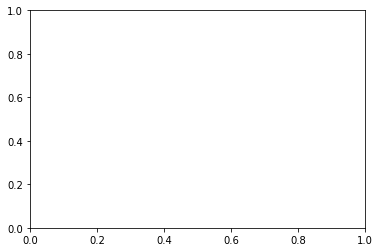

In [65]:
plt.plot(df.Week, df.win_at_home)